In [ ]:
# encoding: utf-8

from IPython.display import Image
from IPython.display import HTML
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.family': 'Arial'})
matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams['figure.figsize']=(15,8)

#from traitlets.config.manager import BaseJSONConfigManager
#path = "~/.jupyter/nbconfig" #"/anaconda/pkgs/_nb_ext_conf-0.3.0-py35_0/etc/jupyter/nbconfig"
#cm = BaseJSONConfigManager(config_dir=path)
#cm.update('livereveal', {
#              'theme': 'sky',
#              'transition': 'zoom',
#              'start_slideshow_at': 'selected',
#})

import pylab as plt
import numpy as np

# Uczenie maszynowe

Na tych zajęciach zapoznamy się z koncepcjami "uczenia maszynowego". 

Podejście to jest nieco odmienne od standardowego programowania. 

Algorytmy, które będziemy omawiać bardziej stanowią "metodologię uczenia" niż sposoby kodowania rozwiązań konkretnych problemów. 

Zobaczymy jak łączą się pojęcia ze statystyki, algebry z inspiracjami biologicznymi.

## Kilka przykładów zastosowań: 
* rozpoznawanie pisma ręcznego, 
* rozpoznawanie mowy,
* data mining,
* algorytmy podpowiadające co klient mógłby jeszcze chcieć zobaczyć/kupić - w sklepach internetowych
* samochody autonomiczne

## Pierwsze historycznie podejścia: 
### Arthur Samuel (1959):
"Uczenie maszynowe: dziedzina nauki, która ma umożliwić uczenie komputerów bez bezpośredniego ich programowania."

* Program do gry w szachy, bazował na wynikach kilku tysięcy rozgrywek. 
* Jego program grał w szachy lepiej od autora.

## Typy uczenia

Na wstępie warto może wspomnieć, że uczenie może przebiegać:
* z nadzorem 
> Uczenie z nadzorem przypomina typowe uczenie w szkole, gdzie nauczyciel podaje przykłady dla których znane są prawidłowe odpowiedzi i potrafi uczniowi wskazać błędy. 
* bez nadzoru. 
> Uczenie bez nadzoru przypomina nieco uczenie się postrzegania świata przez małe dziecko. Bazuje ono głównie na obserwowaniu związków przyczynowo skutkowych - korelacji - pomiędzy różnymi bodźcami - de facto przeciwienstwo uczenia z nadzorem.
* ze wzmocnieniem
> przypomina naukę chodzenia - jak się uda to nagroda , a jak się dziecko przewróci to boli - kara - do robotów to sie mocno nadaje
optymalizacja strategii

## Podstawowe pojęcia i notacja 

W tym miejscu wprowadzimy kilka ważnych pojęć i notację, z której będziemy korzystać w trakcie dalszych wykładów.

* __wejście__: oznaczmy ją $x$. W kontekście uczenia maszynowego dane wejściowe często nazywane są _cechami_ (ang. features).

* __przestrzeń wejść__: przestrzeń, z której pochodzą dane wejściowe, oznaczymy ją $X$

* __wyjście__: oznaczymy go $y$.

* __przestrzeń wyjść__: przestrzeń, z której pochodzą dane wyjściowe, oznaczymy ją $Y$

* __przykład__: para wejścia i odpowiadającego mu wyjścia: $(x,y)$ stanowi pojedynczy przykład.

* __ciąg uczący__: zbiór przykładów $\lbrace (x^{(i)}, y^{(i)}), \quad i = 1, \dots ,m\rbrace $, potęga oznacza numer przykładu

* __hipoteza__ (model): $h$: odwzorowanie $h: X\rightarrow Y$, które "dobrze" pasuje do przykładów ciągu uczącego.

 * Tu warto zaznaczyć, że milcząco zakłądamy, że istnieje jakaś realcja, odwzorowanie $X\rightarrow Y$
 * $h$ zwykle zależy od parametrów $\theta$ , np. dla $h = a\cdot x +b$ $\qquad\theta = [b,a]$

## Istota uczenia z nadzorem
Formalnie proces uczenia z nadzorem polega na tym, żeby mając dany ciąg uczący znaleźć funkcję $h$ taką, że dobrze przewiduje wartości $y$ jeśli dany jest $x$.

$\qquad$ $\lbrace (x^{(i)}, y^{(i)}), \quad i = 1, \dots ,m\rbrace $ $\qquad$ $h: X\rightarrow Y$


* Gdy zmienna $y$ jest __ciągła__ problem nazywamy _regresją_. 
* Gdy zmienna $y$ jest __dyskretna__ problem nazywamy _klasyfikacją_.

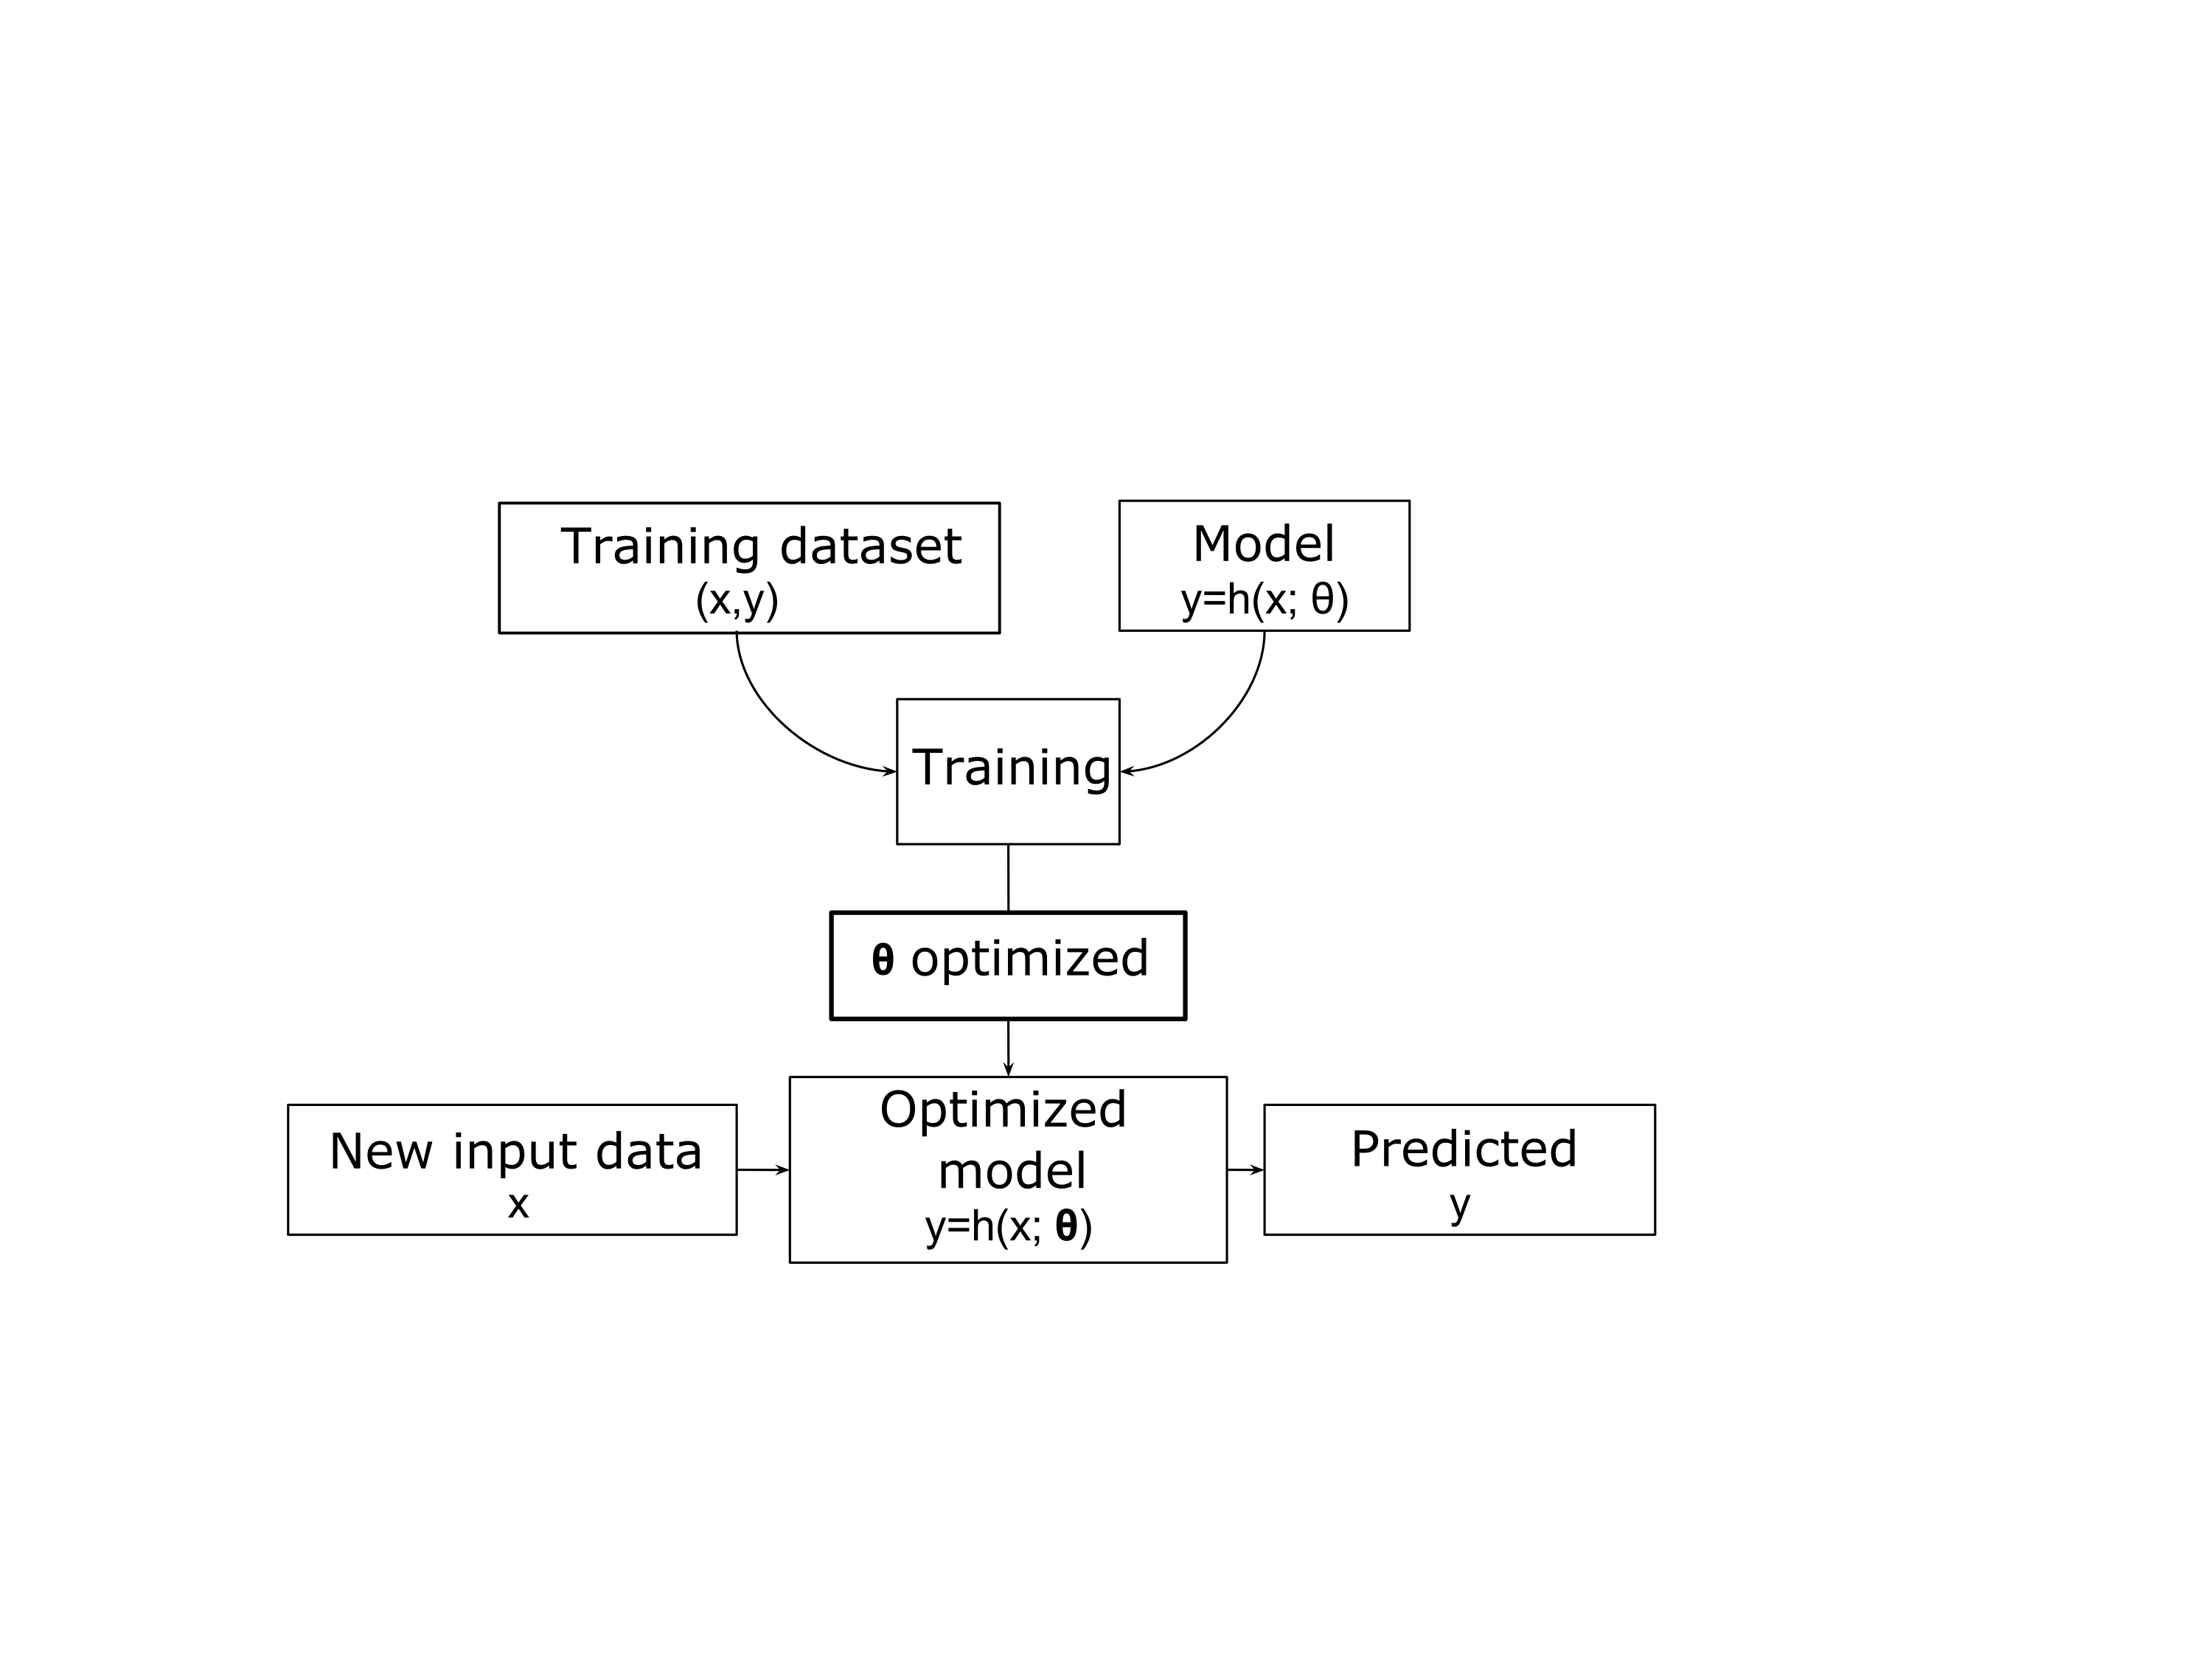

<img src="Uczenie z nadzorem.png" width="1600">

## Przykład ciągu uczącego: 


In [ ]:
x = np.array([170,173,186,134,146]) # wzrost w cm
y = np.array([75, 91, 80, 29,47]) # masa w kg
print("Ciąg uczący: (x,y)")
for i in range(len(x)):     # wyswietla pary wejscie wyjscie
    print("Przykład %d: (%d, %d)"%(i, x[i],y[i]))

Zobaczmy ten ciąg uczący

In [ ]:
plt.plot(x,y,'o')
plt.xlabel('x: wzrost w cm')
plt.ylabel('y: masa w kg')
plt.show()

Chcielibyśmy dopasować tu funkcję, która pozwoliłaby nam przewidzieć masę. 

* Tu rozsądna wydaje się funkcja liniowa: 

$\qquad$ $y =  \theta_0+ \theta_1 x $


## Regresja liniowa: uogólnienie

Aby przeprowadzić uczenie z nadzorem musimy zdecydować się jak będziemy reprezentować funkcję $h$ w komputerze. Na początek załóżmy, że będzie to funkcja liniowa:

 $h_{\theta }(x) = \theta_0 + \theta_1 x_1 $

Parametry $\theta _i$ (zwane także wagami) parametryzują przestrzeń funkcji liniowych $X \rightarrow Y$. 

Tam gdzie nie będzie to powodować niejednoznaczności zamiast $h_\theta (x)$ będziemy pisać $h(x)$. 

Dla uproszczenia notacji wprowadzimy też "sztuczne" wejście $x_0 =1 $, zaś parametr $\theta _0$ nazywać będziemy obciążeniem (ang. *bias*).


Stosując powyższą konwencję możemy napisać:

 $h(x) = \sum _{i=0}^n \theta _i x_i $

(u nas $n = 1$).

## Notacja wektorowa

Niektóre rachunki uproszczą się nam jeśli zastosujemy notację wektorową.  Wektor parametrów i wektor cech są wektorami kolumnowymi.
Oznaczmy:

$\mathbf {\theta } = \begin{bmatrix}
\theta _0, \\
\vdots \\
\theta _n
\end{bmatrix},
\qquad
\mathbf {x} = \begin{bmatrix}
x_0\\
\vdots\\
x_n
\end{bmatrix}$

 Wówczas:

$h(x) = \sum _{i=0}^n \theta _i x_i =   \mathbf{\theta }^T \mathbf{x} $


## Qiuz
 
* Co to jest hipoteza?
* Na czym polega uczenie z nadzorem?

## Przykład:
Niech $\theta_1 = 2$ a $\theta_0 = -3$ wówczas dla $x = 170$ mamy:


In [ ]:
h = -3*1 + 2*170 
print(h)

lub wprowadzając naszą notację wektorową można to obliczyć tak:

In [ ]:
theta = np.array([-3, 2]).reshape(2,1)      # robimy wektor kolumnowy 2 wiersze 1 kolumna, przy pomocy reshape
print("theta = ",theta)
xx = np.array([1,170]).reshape(2,1)     # tu analogicznie
print("xx = ", xx)

h = np.dot(theta.T,xx)
print("h = ",h)

## Jak znaleźć parametry?
Aby prześledzić dopasowywanie parametrów stwórzmy zbiór uczący o znanych parametrach, takich jak powyżej:

In [ ]:
m=10
x = np.linspace(0, 10,m).reshape(m,1) # formujemy wejście w wektor kolumnowy
print(x)

aby było łatwiej liczyć dostawimy z przodu kolumnę $x_0=1$

In [ ]:
x_0 = np.ones((m,1))
X = np.hstack((x_0, x))     # przestrzen wejsc
print(X)

In [ ]:
theta_p = np.array([-3, 2]).reshape(2,1)
print(theta_p)

Generujemy wyjścia:

In [ ]:
Y =  np.dot(X,theta_p) + 2*np.random.randn(m,1) # dodajemy szum 
print(Y)

In [ ]:
plt.plot(X[:,1], Y,'bo')
plt.show()

## Funkcja kosztu
* Co to znaczy, że funkacja h(x) **dobrze** przewiduje y?
* Jak możemy to wyrazić formalnie?
* Potrzebna jest nam matematyczna miara, tego jak dobre jest przewidywanie.

Potrzebny jest nam:
1. ciąg uczący 

2. **funkcja kosztu** (*ang. loss function*), oznaczymy ją $J({\mathbf \theta})$  - czym __niższa__ jej wartość, tym lepiej hipoteza ($y = h_\theta(x)$) opisuje dane.
 * zauważmy, że jest to funkcja, której argumentami są parametry hipotezy.

Często stosowaną funkcją jest:
$\qquad$ $J(\mathbf {\theta }) = \frac{1}{2} \sum _{i=1}^{m} \left( h_\theta (x^{(i)}) - y^{(i)} \right)^2 $

$h_\theta (x^{(i)})$ - to jest to co nam zwraca model, $y$ to co mamy z danych

(**Uwaga**: $^{(i)}$ to indeks przykładu a nie potęga. )

Teraz możemy powiedzieć, że "dobre" parametry to takie, które minimalizują funkcję kosztu.


Jeśli w naszym przykładzie $\theta_1 = 2$ a $\theta_0 = -3$ to $J$ wynosi:

In [ ]:
J = 0
theta_p = np.array([-3, 2]).reshape(2,1)
#theta_p = np.array([-3, 1.9]).reshape(2,1)
print(theta_p)
for i in range(m):
    J += 0.5*(theta_p[1]*x[i] +theta_p[0] - Y[i])**2
print(J)

## Funkcja kosztu w przestrzeni parametrów

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

N= 100
Theta_0 = np.linspace(-20,20,N)
Theta_1 = np.linspace(-20,20,N)

J = np.zeros((N,N))

for  k, theta_0 in enumerate(Theta_0):
    for l,theta_1 in enumerate(Theta_1):
        for i in range(m):
            J[l,k] += 0.5*(theta_1*X[i,1] + theta_0 - Y[i])**2

Theta_0, Theta_1 = np.meshgrid(Theta_0, Theta_1)

fig, ax1 = plt.subplots()
ax1.contourf(Theta_0, Theta_1, J,30)
ax1.set_xlabel("theta_0")
ax1.set_ylabel("theta_1")

ax1.plot(theta_p[0], theta_p[1],'*',color=[1,1,1])
plt.axis('square')
plt.show()



## Algorytm najmniejszych kwadratów

Chcemy znaleźć takie parametry aby zminimalizować funkcję kosztu. Zobaczmy czy zadziała następujący pomysł:

_Zacznijmy od pewniej "odgadniętej" wartości początkowej. Następnie zmieniamy ją zgodnie z kierunkiem przeciwnym do gradientu funkcji kosztu._

Warto tu przypomnieć, że gradient funkcji to wektor, którego kierunek pokrywa się z kierunkiem, w którym funkcja zmienia się najszybciej, a zwrot wskazuje kierunek, w którym funkcja rośnie. Zatem jeśli wyobrazimy sobie funkcję jako pofałdowany teren, to poruszając się w kierunku przeciwnym do gradientu powinniśmy dotrzeć do niżej położonych partii terenu.


Formalnie algorytm _minimalizacji gradientowej_ możemy zapisać:

`zainicjuj theta,
powtarzaj aż zbiegniesz:
        dla każdego` $j$: $\theta _{j} := \theta _j - \alpha \frac{\partial }{\partial \theta _j } J(\theta ) $

gdzie parametr $\alpha $ to szybkość uczenia.

Przyjrzyjmy się pochodnej cząstkowej występującej w tym wzorze $\frac{\partial }{\partial \theta _j } J(\theta ) $



### Pochodna cząstkowa

$\frac{\partial }{\partial \theta _j } J(\theta ) =\frac{\partial }{\partial \theta _j } \frac{1}{2} \sum _{i=1}^{m} \left( h_\theta (x^{(i)}) - y^{(i)} \right)^2  $  `# wchodzę z pochodną pod sumę`

$\qquad\quad =\frac{1}{2} \sum _{i=1}^{m} \frac{\partial }{\partial \theta _j } \left( h_\theta (x^{(i)}) - y^{(i)} \right)^2$ `# stosuję regułę łańcuchową`

$\qquad\quad =\frac{1}{2} \sum _{i=1}^{m} 2 \left( h_\theta (x^{(i)}) - y^{(i)} \right)\frac{\partial }{\partial \theta _j }h_\theta (x^{(i)})$ `# podstawiam jawnie h(x)`

$\qquad\quad = \sum _{i=1}^{m} \left( h_\theta (x^{(i)}) - y^{(i)} \right)\frac{\partial }{\partial \theta _j } \sum _{j=0}^n \theta _j x_j^{(i)}$ `# wchodzę z pochodną pod sumę`

$\qquad\quad = \sum _{i=1}^{m} \left( h_\theta (x^{(i)}) - y^{(i)} \right) \sum _{j=0}^n \frac{\partial }{\partial \theta _j }\theta _j x_j^{(i)} $

Ostatecznie:
$
\frac{\partial }{\partial \theta _j } J(\theta ) = \sum _{i=1}^{m} \left( h_\theta (x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$

### Algorytm minimalizacji gradientowej (zbiorczy):
Czyli zbierając te wyniki otrzymujemy algorytm:
* `Zainicjuj` $\theta _{j}$
* `powtarzaj, aż zbiegniesz:`

$\qquad$ dla każdego $j$: $\theta _{j} := \theta _j - \alpha \sum _{i=1}^{m} \left( h_\theta (x^{(i)}) - y^{(i)} \right) x_j^{(i)}$

Algorytm najmniejszych kwadratów ma kilka cech, które są intuicyjne i naturalne:
* Wartość zmiany jest proporcjonalna do błędu. 
* Gdy mamy przykład uczący, dla którego przewidywanie prawie zgadza się z $y$ to wprowadzane zmiany parametrów są małe. 
* Większa zmiana parametrów będzie dla przykładu, który generuje większy błąd.
* Powyższe obliczenia dotyczą sytuacji gdy ciąg uczący zawierają wiele przykładów i poprawki obliczamy biorąc pod uwagę wszystkie przykłady. Jest to tak zwany algorytm gradientowy **zbiorczy** (ang. batch gradient descent).



In [ ]:
def licz_iteracyjnie_batch(X,Y,
                           theta0, 
                           alpha ):
    N = 15
    th = np.zeros((N+1,2))
    th[0,:]=theta0.T
    for n in range(N):
        #poprawianie
        dJ = np.zeros(len(theta0)).reshape(len(theta0),1)
        for ind, x in enumerate(X):# mały x to wejście pojedynczego przykładu o indeksie in
            x = x.reshape(2,1)
            h = np.dot(theta0.T, x)
            dJ += ( h - Y[ind])*x
         
        theta0 = theta0 - alpha * dJ 
        
        th[n+1,:] = theta0.T
        # rysowanie:
        y_reg = np.dot(X,theta0)
        fig, ax = plt.subplots(1,2)
        #plt.subplot(1,2,1)
        ax[0].plot(X[:,1], Y,'bo')
        ax[0].plot(X[:,1],y_reg,'m')
       
        
        #plt.subplot(1,2,2)
        ax[1].contourf(Theta_0, Theta_1, J, 30)
        ax[1].plot(theta_p[0], theta_p[1],'*',color=[1,1,1])
        #plt.plot(theta0[0],theta0[1],'mo')
        ax[1].plot(th[:n+1,0],th[:n+1,1],'mo')
        ax[1].plot((th[n,0],th[n,0]-alpha*dJ[0]),(th[n,1], th[n,1]-alpha*dJ[1]),'r')
        plt.axis('square')
        plt.xlabel("theta_0")
        plt.ylabel("theta_1")
    return theta0, th

theta0 = np.array([-15, -15.]).reshape(2,1)
alpha = 0.001
theta_est_iter_batch, th = licz_iteracyjnie_batch(X, Y, theta0, alpha)

print("theta = ", str(theta_est_iter_batch.T))

### Algorytm minimalizacji gradientowej (stochastyczny)

* Uaktualnianie parametrów funkcji kosztu można też prowadzić po każdej prezentacji elementu ciągu uczącego. 
* Każdy przykład daje przyczynek dodatni. 
* Zatem minimalizując każdy z przyczynków niezależnie również zminimalizujemy funkcję kosztu. 

Wersja algorytmu, w której zmiany parametrów obliczane są i dla pojedynczych przykładów z ciągu uczącego podawanych w losowej kolejności nosi nazwę **stochastycznego** algorytmu minimalizacji gradientowej. Ta wersja algorytmu jest zwykle bardziej wydajna obliczeniowo.

* `Zainicjuj` $\theta _{j}$
* `powtarzaj, aż zbiegniesz:`

$\qquad$ `wylosuj przykład` $i$

$\qquad$$\qquad$ `dla każdego` $j$: $\theta _{j} := \theta _j - \alpha  \left( h_\theta (x^{(i)}) - y^{(i)} \right) x_j^{(i)}$

* Algorytm gradientowy jest wrażliwy na minima lokalne, tzn. że z danego punktu w przestrzeni parametrów prowadzi do najbliższego minimum lokalnego. 

* Na szczęście w przypadku regresji linowej istnieje tylko jedno minimum i jest to minimum globalne.

In [ ]:
def licz_iteracyjnie_stoch(X,Y,
                           theta0, 
                           alpha):
    N = 15
    th = np.zeros((N+1,2))
    th[0,:]=theta0.T
    for n in range(N):

        #losuję przykład
        i = np.random.randint(len(x))
        xx = X[i].reshape(2,1)
        h = np.dot(theta0.T,xx)
        dJ= ( h - Y[i]) * xx
        theta0 = theta0 - alpha * dJ 
        
        
        # rysowanie:
        th[n+1,:] = theta0.T
        # rysowanie:
        y_reg = np.dot(X,theta0)
        fig, ax = plt.subplots(1,2)
        #plt.subplot(1,2,1)
        ax[0].plot(X[:,1], Y,'bo')
        ax[0].plot(X[:,1],y_reg,'m')
       
        
        #plt.subplot(1,2,2)
        ax[1].contourf(Theta_0, Theta_1, J, 30)
        ax[1].plot(theta_p[0], theta_p[1],'*',color=[1,1,1])
        #plt.plot(theta0[0],theta0[1],'mo')
        ax[1].plot(th[:n+1,0],th[:n+1,1],'mo')
        ax[1].plot((th[n,0],th[n,0]-alpha*dJ[0]),(th[n,1], th[n,1]-alpha*dJ[1]),'r')
        plt.axis('square')
        plt.xlabel("theta_0")
        plt.ylabel("theta_1")
        
    return theta0

theta0 = np.array([-15, -15]).reshape(2,1)
alpha = 0.01
theta_est_iter_stoch = licz_iteracyjnie_stoch(X,Y, theta0, alpha)

print("theta = ", str(theta_est_iter_stoch.T))

## Równania normalne

* Iteracyjna wersja minimalizacji funkcji kosztu przyda nam się jeszcze przy omawianiu algorytmów uczenia sztucznych sieci neuronowych. 
* W pewnych sytuacjach można wykorzystać nieco bardziej narzędzia algebry i analizy matematycznej i znaleźć optymalne parametry analitycznie. 
* W tym celu trzeba znaleźć pochodną funkcji kosztu po parametrach i przyrównać ją do zera.

## Rachunki macierzowe
Aby rachunki poszły nam sprawniej przypomnijmy kilka wzorów z algebry.


Dla danej funkcji $f: \mathcal {R}^{n \times m} \rightarrow \mathcal {R}$ mapującej macierze $n \times m$ na liczby rzeczywiste definiujemy pochodną $f$ względem $A$ jako:

$
\nabla _A f(A) = \left[
\begin{array}{ccc}
\frac{\partial f}{\partial A_{1,1}} & \dots & \frac{\partial f }{\partial A_{1,n}} \\
\vdots & & \vdots \\
\frac{\partial f}{\partial A_{n,1}}& \dots &\frac{\partial f}{\partial A_{n,n}}
\end{array}
\right]
$

Zatem gradient $\nabla _A f(A) $ jest macierzą $n \times m$, której element $(i,j)$ to pochodna cząstkowa $ \frac{\partial f}{\partial A_{i,j}}$.

Jako przykład weźmy macierz

$A =
\left[
\begin{array}{cc}
A_{1,1} & A_{1,2} \\
A_{2,1} & A_{2,2}
\end{array}
\right]
$

i funkcję $f: \mathcal {R}^{n \times m} \rightarrow \mathcal {R}$ :

$
f(A) = \frac{3}{2} A_{1,1} + 5 A_{1,2}^2 + A_{2,1} A_{2,2}
$

W tym przypadku otrzymujemy:

$
\nabla _A f(A) = \left[
\begin{array}{ccc}
\frac{3}{2} & 10 A_{1,2} \\
A_{2,2} & A_{2,1}
\end{array}
\right]
$

## Własności śladu 
Dla przypomnienia operator śladu macierzy kwadratowej $A$ to suma elementów diagonalnych:

$\qquad \textrm{tr}A = \sum_{i=1}^{n}A_{i,i}$

Operator śladu jest przemienny, tzn.

$\qquad \textrm{tr}AB = \textrm {tr}BA$

Zachodzi również:

$\qquad\textrm{tr}A =\textrm {tr}A^T$

$\qquad\textrm{tr}(A+B) =\textrm {tr}A + \textrm {tr}B$

$\qquad\textrm{tr}(aA) = a\textrm {tr}A$

Dla pochodnych macierzowych zachodzi:


$\qquad\nabla _A \textrm {tr}AB = B^T $

$\qquad\nabla _{A^T} f(A) = (\nabla _A f(A))^T$

Teraz aby zminimalizować funkcję kosztu $J$ znajdzmy jej pochodną względem $\theta $. 


## Minimalizacja funkcji kosztu

Uzbrojeni w powyższe wzory możemy powrócić do minimalizacji funkcji kosztu.

Zbudujmy macierz wejść $X$ w taki sposób, że wejścia z poszczególnych przykładów są jej wierszami: $\qquad X =\left[\begin{array}{ccc}- & ( x^{(1)})^T & - \\& \vdots & \\- &(x^{(m)})^T &-\end{array}\right]$

Z wartości wyjściowych zbudujemy wektor kolumnowy: $\qquad \mathbf {y} = \left[
\begin{array}{c}
y^{(1) }\\
\vdots \\
y^{(m)}
\end{array}
\right]
$

Ponieważ $h_\theta (x^{(i)} ) = (x^{(i)})^T \theta $ możemy zapisać:

$\qquad X \theta - \mathbf {y} =\left[\begin{array}{c}( x^{(1)})^T \theta \\ \vdots \\ (x^{(m)})^T \theta \end{array}\right] - \left[\begin{array}{c}y^{(1) }\\ \vdots \\y^{(m)}\end{array}\right]=\left[\begin{array}{c} h_\theta (x^{(1)}) - y^{(1) }\\ \vdots \\ h_\theta (x^{(m)}) - y^{(m)} \end{array} \right]$

Korzystając z faktu, że dla wektora $\mathbf {z}$ mamy $\mathbf {z}^T\mathbf {z}=\sum _i z_i^2$ możemy zapisać funkcję kosztu w następujący sposób:

$\qquad J(\theta ) = \frac{1}{2} \sum _{i=1}^m \left( h_\theta (x^{(i)} ) - y^{(i)}\right)^2 = \frac{1}{2} (X \theta - \mathbf {y})^T (X \theta - \mathbf {y}) $

Tak więc:

$\qquad$
$\begin{matrix}
\nabla _\theta J(\theta ) &=& \nabla _\theta \frac{1}{2} (X \theta - \mathbf {y})^T (X \theta - \mathbf {y}) \\
&=& \frac{1}{2} \nabla _\theta ( \theta ^T X ^T X \theta -\theta ^T X^T \mathbf {y} - \mathbf {y}^T X \theta + \mathbf {y}^T \mathbf {y}) \\
&=& \frac{1}{2} \nabla _\theta \textrm {tr}( \theta ^T X ^T X \theta -\theta ^T X^T \mathbf {y} - \mathbf {y}^T X \theta + \mathbf {y}^T \mathbf {y}) \\
&=& \frac{1}{2} \nabla _\theta (\textrm {tr} \theta ^T X ^T X \theta - 2 \textrm {tr} \mathbf {y}^T X \theta ) \\
&=& \frac{1}{2} ( X ^T X \theta +X^T X \theta - 2 X^T \mathbf {y}) \\
&=& X^T X \theta - X^T \mathbf {y}
\end{matrix}$

Użyte tricki:

* w trzecim kroku skorzystaliśmy z tego, że ślad liczby jest tą samą liczbą
* w czwartym kroku skorzystaliśmy z tego, że $\textrm {tr}A = \textrm {tr}A^T$

>Aby zminimalizować funkcję kosztu kładziemy jej pochodną równą 0 i otrzymujemy **równanie normalne**:

$\qquad X^T X \theta = X^T \mathbf {y}$

Z niego możemy obliczyć parametry minimalizujące funkcję kosztu:

$\qquad \theta = (X^T X )^{-1} X^T \mathbf {y}$

In [ ]:
print("X = ")
print(X)
print("Y = ")
print(Y)

theta = np.dot(np.dot(np.linalg.inv( np.dot(X.T,X)), X.T), Y)

print("theta = ")
print(theta)
theta_0 = theta_p[0]
theta_1 = theta_p[1]
J = 0
for i in range(m):
    J += 0.5*(theta_1*x[i] +theta_0 - Y[i])**2
print(J)

## A jakby było w przypadku z szumem w danych ?

## Quiz:
* jakie są trzy algorytmy znajdownia parametrów dla regresji liniowej?

## Interpretacja probabilistyczna

Dlaczego funkcja kosztu $J$ w postaci sumy kwadratów błędów dla problemu regresji jest sensowna? W tej sekcji zaprezentuje zestaw założeń probabilistycznych, dla których kwadratowa funkcja błędu jest naturalną konsekwencją.

Załóżmy, że zmienne wejściowe i wyjściowe powiązane są zależnością:

$\qquad y^{(i)} = \theta ^T x^{(i)} + \epsilon ^{(i)}$

gdzie $\epsilon ^{(i)}$ jest błędem, który albo pochodzi od pewnych nieuwzględnionych w modelu regresji czynników lub czynnikiem losowym. 

![alt text](w5449egf111.gif "Model probabilistyczny regresji")

Załóżmy, że $\epsilon ^{(i)}$ to zmienne _niezależne_ i podlegające _temu samemu rozkładowi_ (ang. IID - independent and identically distributed) normalnemu o średniej zero i wariancji $\sigma ^2$. To założenie zapisujemy krótko: $ \epsilon ^{(i)} \sim \mathcal {N}(0, \sigma ^2)$ . Zatem funkcja gęstości prawdopodobieństwa $\epsilon ^{(i)}$ dana jest wzorem:

$\qquad
p(\epsilon ^{(i)}) = \frac{1}{\sqrt{2 \pi} \sigma } \exp \left( - \frac{ \left(\epsilon ^{(i)} \right)^2}{2 \sigma ^2} \right)
$

Z tego wynika, że:

$\qquad p(y^{(i)}| x^{(i)}; \theta ) = \frac{1}{\sqrt{2 \pi} \sigma } \exp \left( - \frac{ \left(y^{(i)} - \theta ^Tx^{(i)} \right)^2}{2 \sigma ^2} \right) $

Notacja $p(y^{(i)}| x^{(i)}; \theta )$ oznacza funkcję gęstości prawdopodobieństwa zmiennej $y^{(i)}$ mając daną zmienną $x^{(i)}$ sparametryzowaną przez $\theta $.

Prawdopodobieństwo danych (całego ciągu uczącego) określone jest przez rozkład $p(\mathbf {y}|X;\theta )$. Ten rozkład zazwyczaj rozumiany jest jako funkcja $\mathbf {y}$ i $X$ przy ustalonym $\theta $.

Nie mówimy "mając dane $\theta $" bo $\theta $ nie jest zmienną losową. 

## Funkcja wiarygodności
Możemy jednak spojrzeć na niego inaczej, tzn. jako funkcję $\theta $ przy ustalonych $X$ i $\mathbf {y}$. 

Funkcję tą nazywamy _funkcją wiarygodności_:

$\qquad L(\theta ) = L(\theta ;X,\mathbf {y}) = p(\mathbf {y}|X;\theta )$

_Funkcja wiarygodności to prawdopodobieństwo zaobserwowania ciągu uczącego w zależności od przyjętego $\theta$._

Zauważmy, że dzięki założeniu o niezależności $\epsilon ^{(i)}$ możemy tą funkcję zapisać jako:

$\qquad \begin{matrix}
L(\theta ) &=& \prod _{i=1}^m p(y^{(i)} | x^{(i)};\theta )\\
&=& \prod _{i=1}^m \frac{1}{\sqrt{2 \pi} \sigma } \exp \left( - \frac{ \left(y^{(i)} - \theta ^Tx^{(i)} \right)^2}{2 \sigma ^2} \right)
\end{matrix}$

## Metoda największej wiarygodności
Teraz, mając nasz model probabilistyczny możemy się zapytać: jakie $\theta $ są sensowne? 

Chcielibyśmy, aby były to takie parametry, dla których zaobserwowanie naszego ciągu uczącego jest najbardziej prawdopodobne. Jest to zasada *największej wiarygodności*. 

A zatem w myśl tej zasady trzeba znaleźć $\theta $, które maksymalizuje funkcję wiarygodności $L(\theta )$. Tak naprawdę wystarczy jeśli zmaksymalizujemy dowolną ściśle rosnącą funkcję funkcji wiarygodności. Rachunki znacznie się uproszczą jeśli jako tą funkcję wybierzemy $\log $ (wówczas iloczyn przejdzie w sumę). Ostatecznie chcemy zmaksymalizować:

$\qquad \begin{matrix}
l(\theta ) &=& \log (L(\theta )) \\
&=& \log \prod _{i=1}^m \frac{1}{\sqrt{2 \pi} \sigma } \exp \left( - \frac{ \left(y^{(i)} - \theta ^Tx^{(i)} \right)^2}{2 \sigma ^2} \right)\\
&=& \sum _{i=1}^m \log \frac{1}{\sqrt{2 \pi} \sigma } \exp \left( - \frac{ \left(y^{(i)} - \theta ^Tx^{(i)} \right)^2}{2 \sigma ^2} \right) \\
&=& m \log \frac{1}{\sqrt{2 \pi }\sigma } - \frac{1}{\sigma ^2} \cdot \frac{1}{2} \sum _{i=1}^m \left( y^{(i)} - \theta ^Tx^{(i)} \right)^2
\end{matrix}$

Zauważmy, że aby zmaksymalizować funkcję wiarygodności musimy zminimalizować wyrażenie $ \frac{1}{2} \sum _{i=1}^m \left( y^{(i)} - \theta ^Tx^{(i)} \right)^2 $, czyli wprowadzoną w poprzednim rozdziale funkcję kosztu $J(\theta )$.

## Podsumowując:
Zakładając konkretny model probabilistyczny ciągu uczącego udało nam się pokazać, że minimalizacja funkcji kosztu jest konsekwencją zastosowania zasady największej wiarygodności. Warto jednak pamiętać, że procedura minimalizacji średniego błędu kwadratowego daje sensowne wyniki dla znacznie szerszej klasy modeli danych.

## Quiz:
* Co to jest funkcja wiarygodniści ?
* Na czym polega metoda najwiekszej wiarygodności?